Loading necessary libraries:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

import numpy as np
import sklearn.datasets as ds

%matplotlib inline

# Weighted linear regression (LOWESS/LOESS)

Weighted linear regression takes the closest points and fits the linear regression on these points only:

In [2]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2, high = 2, size=200)
y = 1.0/(1.0 + np.power(x,2)) + np.random.normal(size=len(x), scale=0.1)
p = lowess(y, x, frac=0.6, it=100)

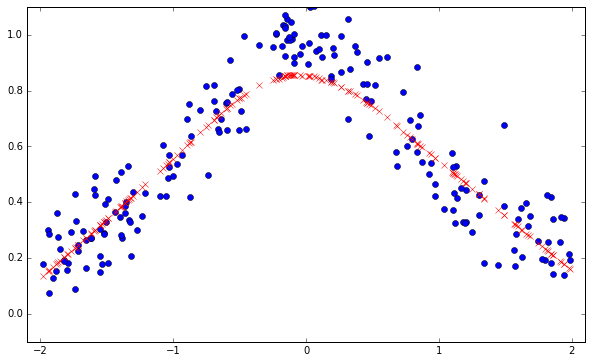

In [3]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-2.1, 2.1), ylim=(-0.1, 1.1))
ax.plot(x,y, 'o')
ax.plot(p[:,0],p[:,1], 'x', color='r')

Notice that this function can work just for given $x$ and $y$. If you want to predict output on the new values of $x$ you should use interp function:

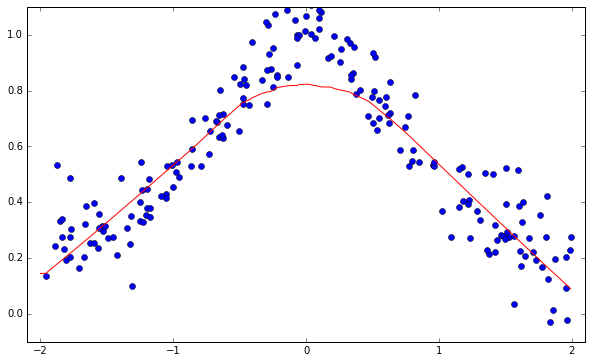

In [7]:
new_x_values = np.arange(-2, 2, 0.01)
new_y_values = np.interp(new_x_values, p[:,0], p[:,1])
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-2.1, 2.1), ylim=(-0.1, 1.1))
ax.plot(x,y, 'o')
ax.plot(new_x_values, new_y_values, 'k-', color = "r")

# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression

Generate data with 100 samples and 2 features:

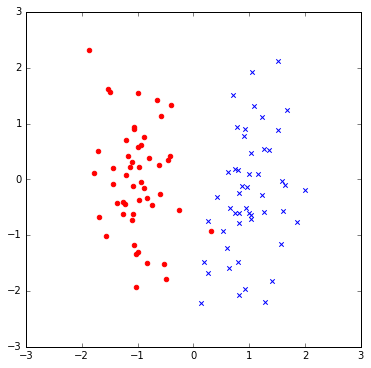

In [2]:
X,y = ds.make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=1,
                             n_clusters_per_class=1,
                             random_state=3216)
markers = ['o', 'x']
ix0 = [i for i,x in enumerate(y) if x == 0]
ix1 = [i for i,x in enumerate(y) if x == 1]
fig = plt.figure(figsize=(6,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()

We will use built-in model:

In [3]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

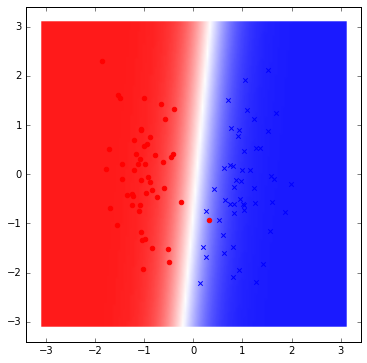

In [62]:
def sigmoid(x1, x2, th0, th1, th2):
    return -1.0/(1+np.exp(-th0 - x1*th1 - x2*th2))

x1 = np.arange(-3.1, 3.1, 0.05)
x2 = np.arange(-3.1, 3.1, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = sigmoid(x1,x2,model.intercept_[0],model.coef_[0][0],model.coef_[0][1])
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(10,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, interpolation='bilinear', extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()

# Perceptron

We train the perceptron algorithm on the same data:

In [4]:
from sklearn.linear_model import Perceptron

In [5]:
model = Perceptron()
model.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

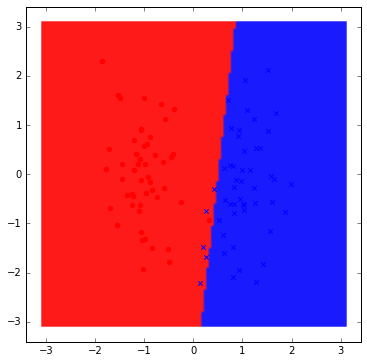

In [6]:
def heaviside(x1, x2, th0, th1, th2):
    return -np.sign(th0 + x1*th1 + x2*th2)

x1 = np.arange(-3.1, 3.1, 0.05)
x2 = np.arange(-3.1, 3.1, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = heaviside(x1,x2,model.intercept_[0],model.coef_[0][0],model.coef_[0][1])
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(10,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, interpolation='bilinear', extent = extent)
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()